# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [17]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [18]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}{city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    response = requests.get(city_url)
    # Run an API request for each of the cities
    #if response.status_code == 200:
    try:
        
        # Parse the JSON and retrieve data
        weather_json = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_json['coord']['lat']
        city_lng = weather_json['coord']['lon']
        city_max_temp = weather_json['main']['temp_max']
        city_humidity = weather_json['main']['humidity']
        city_clouds = weather_json['clouds']['all']
        city_wind = weather_json['wind']['speed']
        city_country = weather_json['sys']['country']
        city_date = weather_json['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | angaur state
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | stanley
Processing Record 5 of Set 1 | birjand
Processing Record 6 of Set 1 | leava
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | avarua
Processing Record 9 of Set 1 | serhetabat
Processing Record 10 of Set 1 | taulaga
Processing Record 11 of Set 1 | taltal
Processing Record 12 of Set 1 | dalnegorsk
Processing Record 13 of Set 1 | tazovsky
Processing Record 14 of Set 1 | selibaby
Processing Record 15 of Set 1 | zurich (kreis 2)
City not found. Skipping...
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | dazuocun
Processing Record 18 of Set 1 | bethel
Processing Record 19 of Set 1 | wailua homesteads
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | sirre
Processing Record 22 of Set

In [19]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [20]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,12.77,73,25,4.19,SH,1698061544
1,angaur state,6.9060,134.1300,28.89,73,56,1.87,PW,1698061545
2,hermanus,-34.4187,19.2345,19.16,71,40,10.92,ZA,1698061545
3,stanley,54.8680,-1.6985,9.87,93,40,1.03,GB,1698061546
4,birjand,32.8663,59.2211,26.26,13,40,3.09,IR,1698061546


In [22]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [23]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,12.77,73,25,4.19,SH,1698061544
1,angaur state,6.9060,134.1300,28.89,73,56,1.87,PW,1698061545
2,hermanus,-34.4187,19.2345,19.16,71,40,10.92,ZA,1698061545
3,stanley,54.8680,-1.6985,9.87,93,40,1.03,GB,1698061546
4,birjand,32.8663,59.2211,26.26,13,40,3.09,IR,1698061546


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

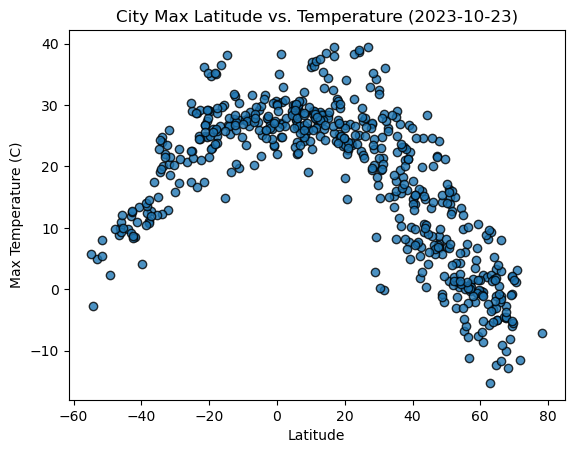

In [39]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values, alpha=.80, edgecolors='black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature (2023-10-23)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

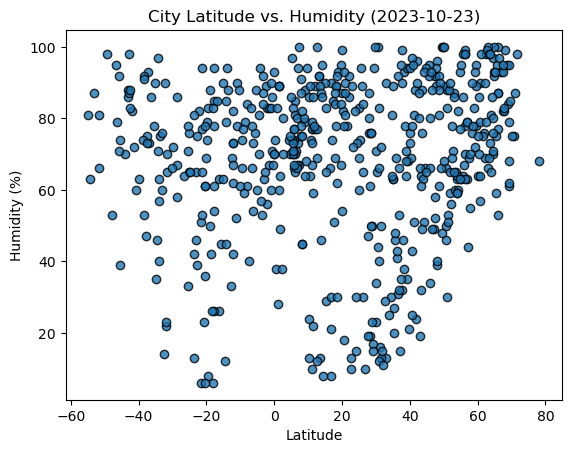

In [41]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values, alpha=.80, edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2023-10-23)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

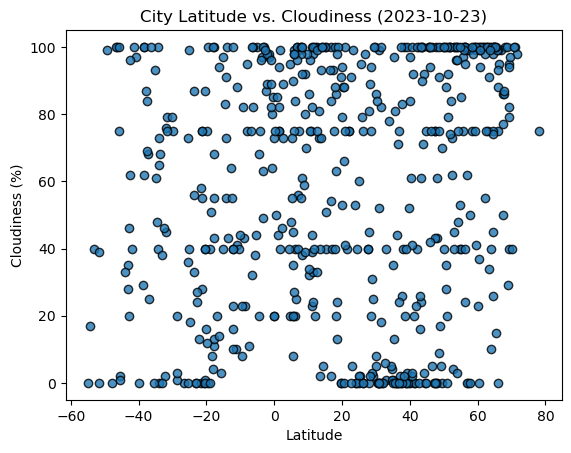

In [43]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values, alpha=.80, edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2023-10-23)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

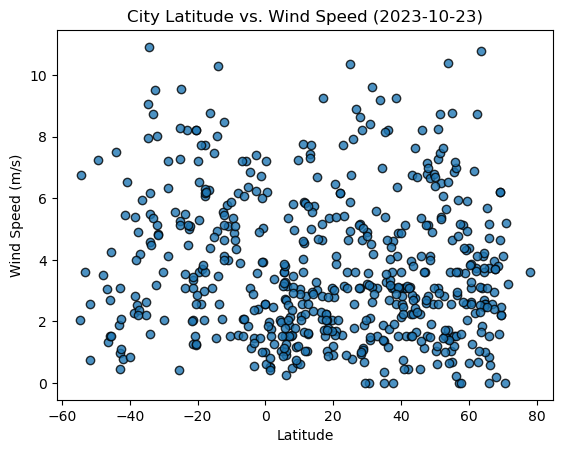

In [46]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values, alpha=.80, edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2023-10-23)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [150]:
# Define a function to create Linear Regression plots
def linear_reg_plots(df,x_val,y_val):
    #Math for scatter plot graph:
    (slope, intercept, rvalue, pvalue, stderr) = linregress(df[x_val], df[y_val])
    line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,3))
    regress_values = df[x_val] * slope + intercept
    
    #Build the scatter plot
    plt.scatter(df[x_val], df[y_val])
    plt.plot(df[x_val], regress_values, "r-", label=line_eq)

    #X and Y labels
    plt.xlabel(x_val)
    plt.ylabel(y_val)

    #Label annotate line equation 
    plt.annotate(line_eq,(df[x_val].min(), df[y_val].min()+5),fontsize=15,color="red")
    
    #Print the r-value
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [151]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
north_hem = city_data_df.loc[city_data_df['Lat']>0,:]
northern_hemi_df = pd.DataFrame(north_hem)
reset_northern_hemi_df= pd.DataFrame(northern_hemi_df.reset_index(inplace=False))

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,angaur state,6.9060,134.1300,28.89,73,56,1.87,PW,1698061545
3,stanley,54.8680,-1.6985,9.87,93,40,1.03,GB,1698061546
4,birjand,32.8663,59.2211,26.26,13,40,3.09,IR,1698061546
8,serhetabat,35.2799,62.3438,22.35,27,13,5.40,TM,1698061549
11,dalnegorsk,44.5604,135.5701,4.11,66,0,1.65,RU,1698061551


In [152]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
south_hem = city_data_df.loc[city_data_df['Lat']< 0,:]
southern_hemi_df = pd.DataFrame(south_hem)
reset_southern_hemi_df= pd.DataFrame(southern_hemi_df.reset_index(inplace=False))
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,12.77,73,25,4.19,SH,1698061544
2,hermanus,-34.4187,19.2345,19.16,71,40,10.92,ZA,1698061545
5,leava,-14.3000,-178.1667,26.72,85,55,8.04,WF,1698061547
6,blackmans bay,-43.0167,147.3167,11.96,86,35,0.45,AU,1698061548
7,avarua,-21.2078,-159.7750,25.03,94,75,2.06,CK,1698061548


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7472204885836444


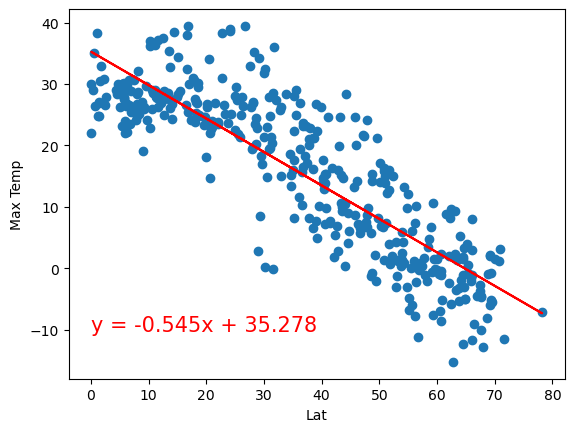

In [168]:
# Linear regression on Northern Hemisphere
linear_reg_data = linear_reg_plots(reset_northern_hemi_df, "Lat", "Max Temp")


The r-value is: 0.6352333465254609


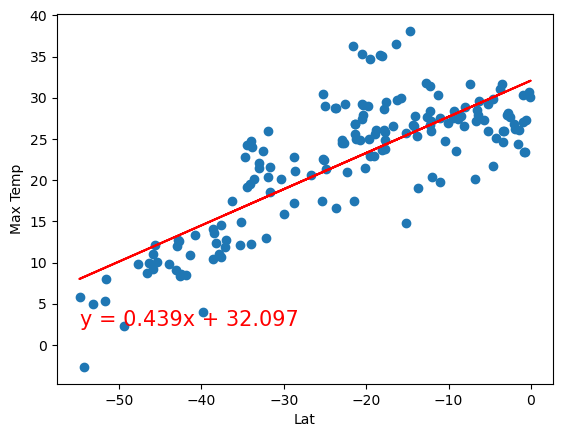

In [167]:
# Linear regression on Southern Hemisphere
linear_reg_data = linear_reg_plots(reset_southern_hemi_df, "Lat", "Max Temp")


**Discussion about the linear relationship:** The Max Temp and Latitue of a city have a strong positive linear correlation. Both the Northern and Southern hemispheres r-value is over .5 with Northern (0.75) being stronger than Southern (0.64).

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.027782058334473066


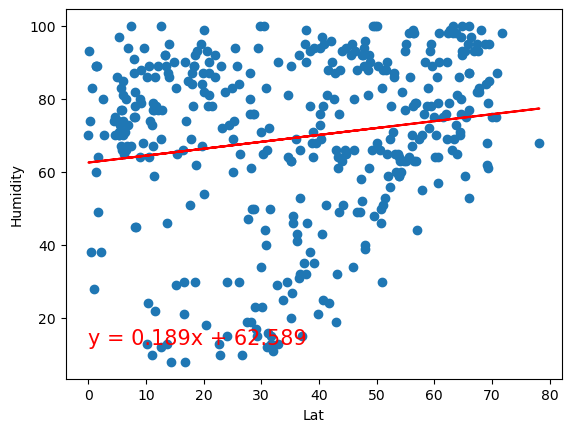

In [166]:
# Northern Hemisphere
linear_reg_data = linear_reg_plots(reset_northern_hemi_df, "Lat", "Humidity")


The r-value is: 0.0023242774156262288


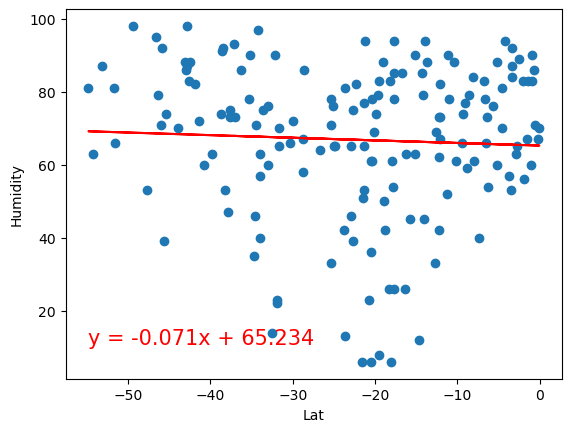

In [165]:
# Southern Hemisphere
linear_reg_data = linear_reg_plots(reset_southern_hemi_df, "Lat", "Humidity")

**Discussion about the linear relationship:** Humidity and Latitude have a minimul linear correlation as both the Northern and Southern hemisphere have a very small r-value. The Northern hemisphere has a stronger linear correlation with an r-value of 0.02778 while the Suthern hemisphere has an r-value of 0.00232.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.011783670252610264


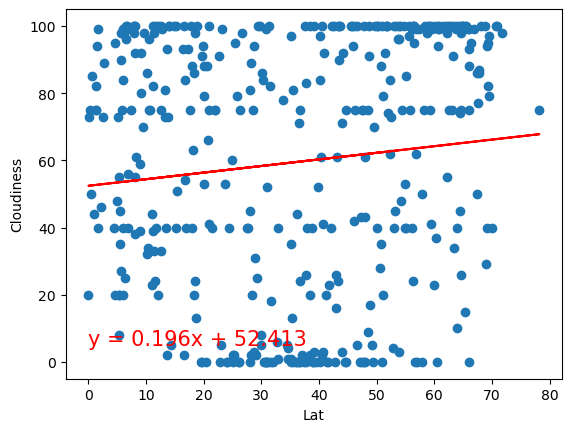

In [164]:
# Northern Hemisphere
linear_reg_data = linear_reg_plots(reset_northern_hemi_df, "Lat", "Cloudiness")


The r-value is: 0.03213009152690333


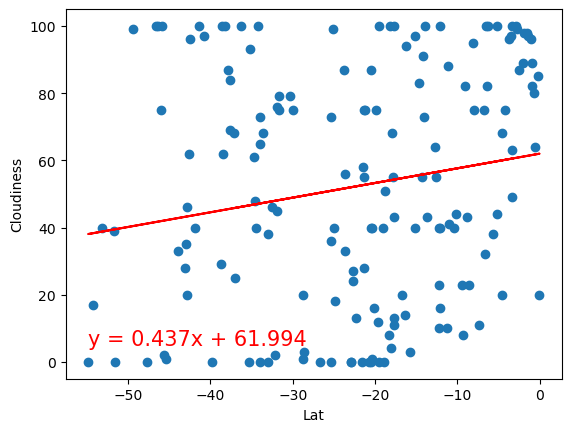

In [163]:
# Southern Hemisphere
linear_reg_data = linear_reg_plots(reset_southern_hemi_df, "Lat", "Cloudiness")


**Discussion about the linear relationship:** Cloudiness and Latitude have a very weak linear correlation with Northern and Southern hemisphere have an r value of 0.01 and 0.03 respectively.  The wide scatter of the markers supports the weak relationship between Cloudiness and Latitude. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.008906638490767388


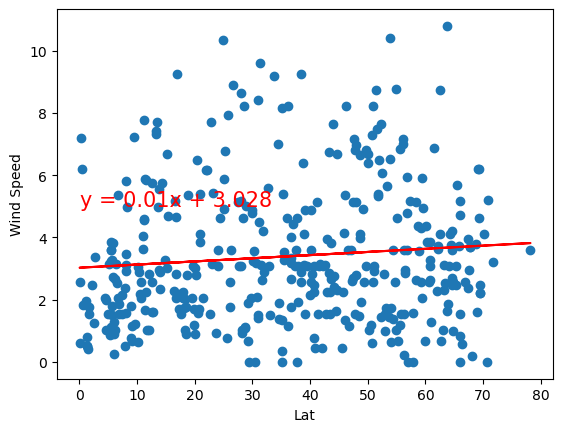

In [162]:
# Northern Hemisphere
linear_reg_data = linear_reg_plots(reset_northern_hemi_df, "Lat", "Wind Speed")

The r-value is: 0.003124147349159312


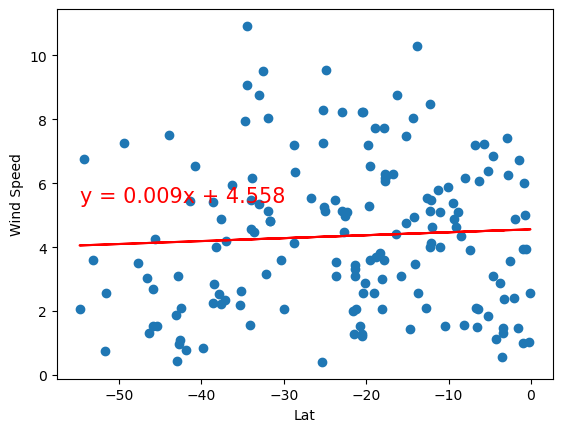

In [169]:
# Southern Hemisphere
linear_reg_data = linear_reg_plots(reset_southern_hemi_df, "Lat", "Wind Speed")

**Discussion about the linear relationship:** Windspeed and Latitude have a very weak linear correlation, both Northern and Southern hemisphere have an r value of 0.00 when rounded to 2 decimal places. The wide scatter of the markers supports the weak relationship between Windspeed and Latitude. 